In [1]:
library("igraph",lib.loc = '../../../R-pkgs/')
library("dplyr",lib.loc = '../../../R-pkgs/')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [132]:
el = read_graph('../../data/processed/mta-elevators.graphml',format = 'graphml')

In [387]:
el

IGRAPH 83899cd U--- 1257 1179 -- 
+ attr: label (v/c), node_type (v/c), id (v/c), component (v/n), color
| (v/c)
+ edges from 83899cd:
 [1]  1--  2  1--  3  2--  4  3--  4  3--  5  3--  7  3--  9  5--  6  6--756
[10]  6--757  6--758  6--759  7--  8  8--726  8--727  8--728  8--729  8--730
[19]  8--731  8--732  8--733  9-- 10 10--760 10--761 10--762 10--763 11-- 12
[28] 11-- 13 12-- 14 13--779 13--780 14-- 15 15--781 15--782 16-- 17 16-- 18
[37] 18-- 19 18-- 21 19-- 20 20--843 20--844 20--845 21-- 22 22--846 22--847
[46] 22--848 23-- 24 23-- 25 25-- 26 25-- 28 25-- 30 26-- 27 27--839 27--840
[55] 27--841 27--842 28-- 29 29--833 29--834 30-- 31 31--835 31--836 31--837
+ ... omitted several edges

In [134]:
unique(get.vertex.attribute(el,'node_type'))

[1] "Elevator"        "Street"          "Mezzanine"       "Platform"       
[5] "Lower Mezzanine" "Upper Mezzanine" "Unknown"         "Train"

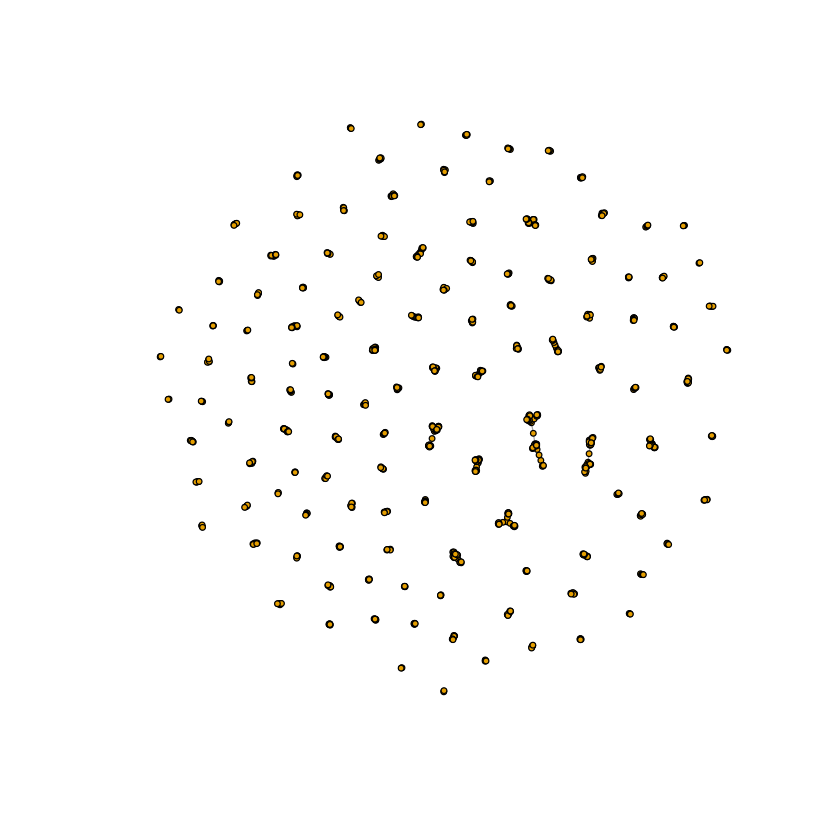

In [135]:
plot(el,vertex.size=2,vertex.label=NA)

In [137]:
comp = components(el)
V(el)$component <- comp$membership

In [152]:
mapcolors <- function(x){
    if(x=="Elevator"){
        return("lightblue")
    }else if(x=='Street'){
        return("orange")
    }else if(x=="Platform"){
        return("white")
    }else if(grepl(pattern = "Mezzanine",x = x)){
        return("yellow")
    }else if(x=="Train"){
        return("red")
    }else {
        return("black")
    }
}

In [153]:
cols <- sapply(V(el)$node_type,FUN=mapcolors,simplify = TRUE)
V(el)$color <- cols

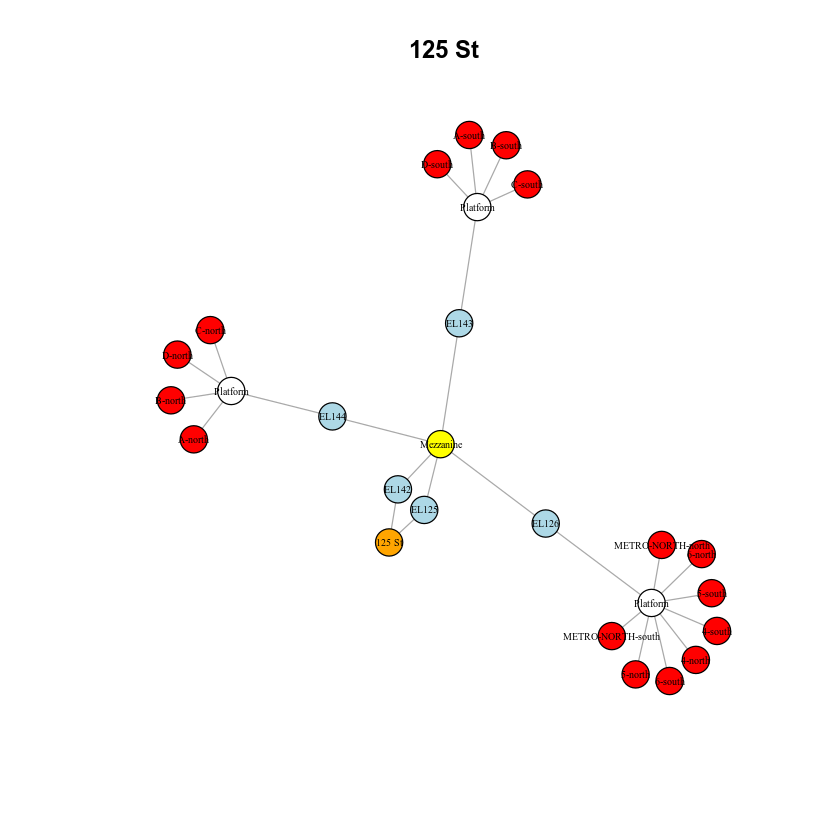

In [188]:
g <- induced_subgraph(el,V(el)[V(el)$component == 1])
plot(g,color=V(g)$color,vertex.size=10,vertex.label.cex=0.5,vertex.label.color='black',main=V(g)$label[V(g)$node_type=="Street"])

In [237]:
ee <- read.csv('../../data/interim/crosswalks/EE_master_list.csv',stringsAsFactors = F)

In [419]:
head(ee[grepl(pattern = "Myr",ee$station_name),])

,X,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,direction,subset_lines,connection_to_street,st_name_opd_format,line,notes,geometry,lat,lon
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
505,504,Myrtle Av / Wyckoff Av,EL396,Gates Ave & Wyckoff Ave (SE corner) to Mezzanine for service in both directions on all lines,BKN,L/M,EL,Y,Y,both directions,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
506,505,Myrtle Av / Wyckoff Av,ES333,Lower Mezzanine to Upper Mezzanine,BKN,L/M,ES,N,Y,,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
507,506,Myrtle Av / Wyckoff Av,ES332,Lower Mezzanine to Upper Mezzanine,BKN,L/M,ES,N,Y,,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
508,507,Myrtle Av / Wyckoff Av,EL397,Mezzanine to L Platform for service in both directions,BKN,L/M,EL,Y,Y,both directions,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
509,508,Myrtle Av / Wyckoff Av,EL398,Mezzanine to M Platform for service in both directions,BKN,L/M,EL,Y,Y,both directions,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562


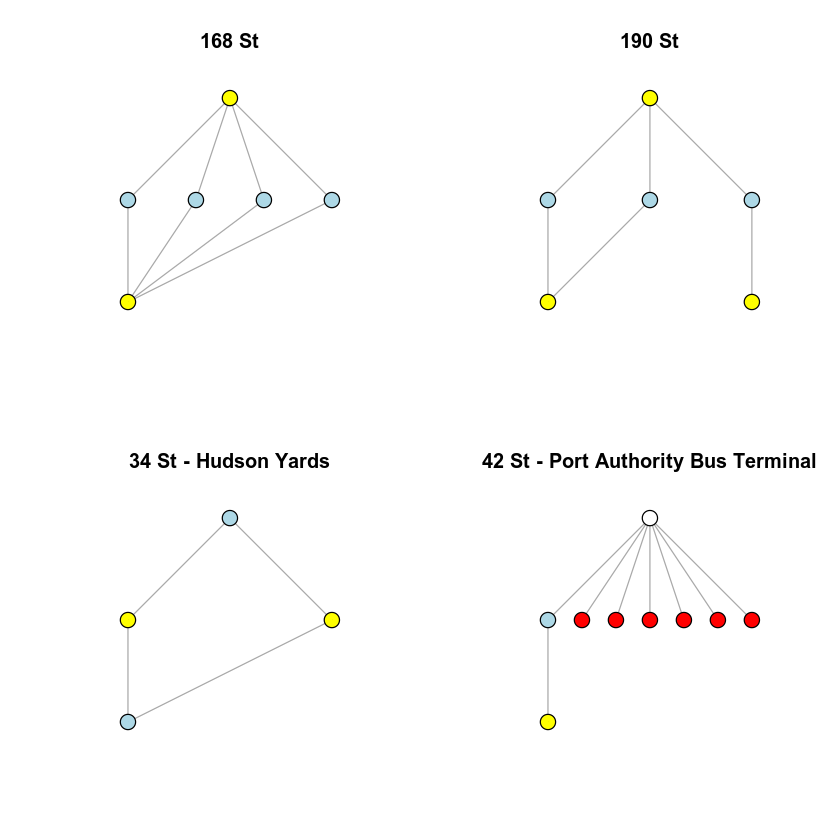

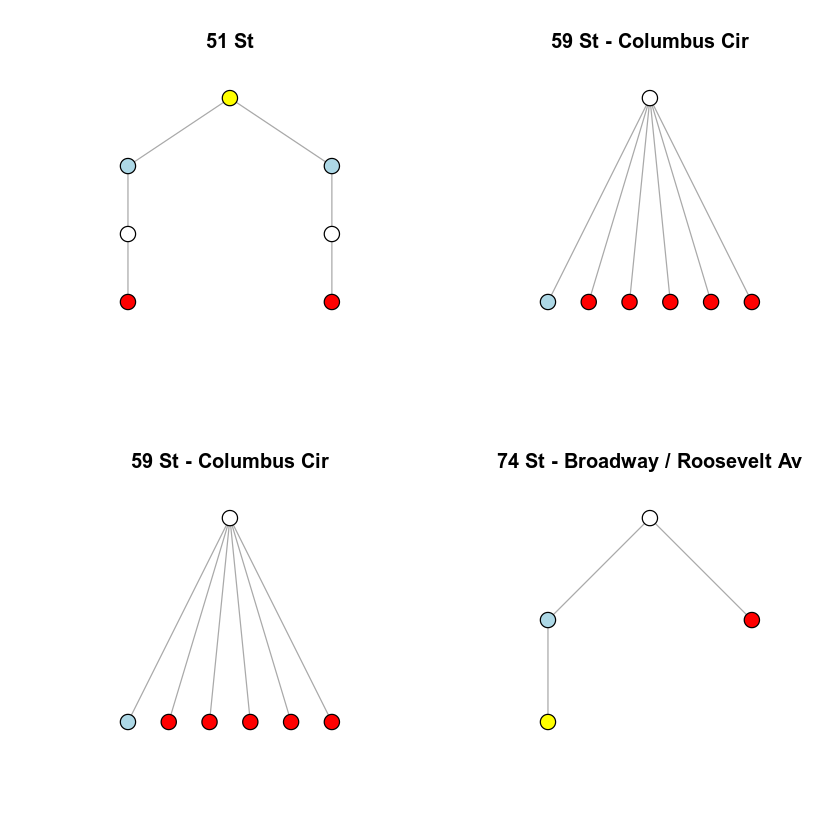

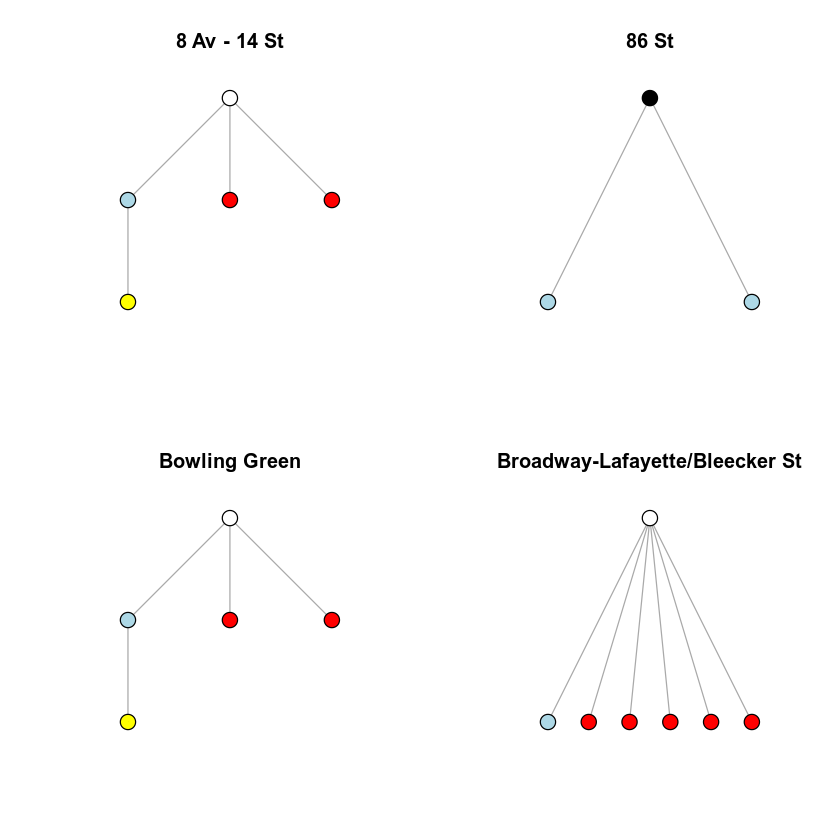

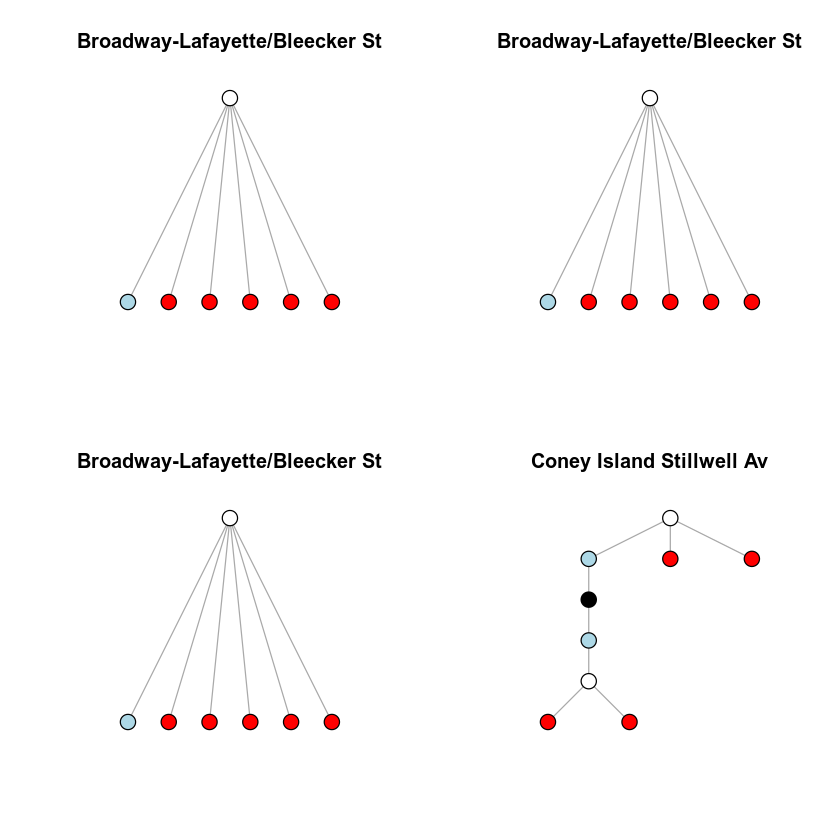

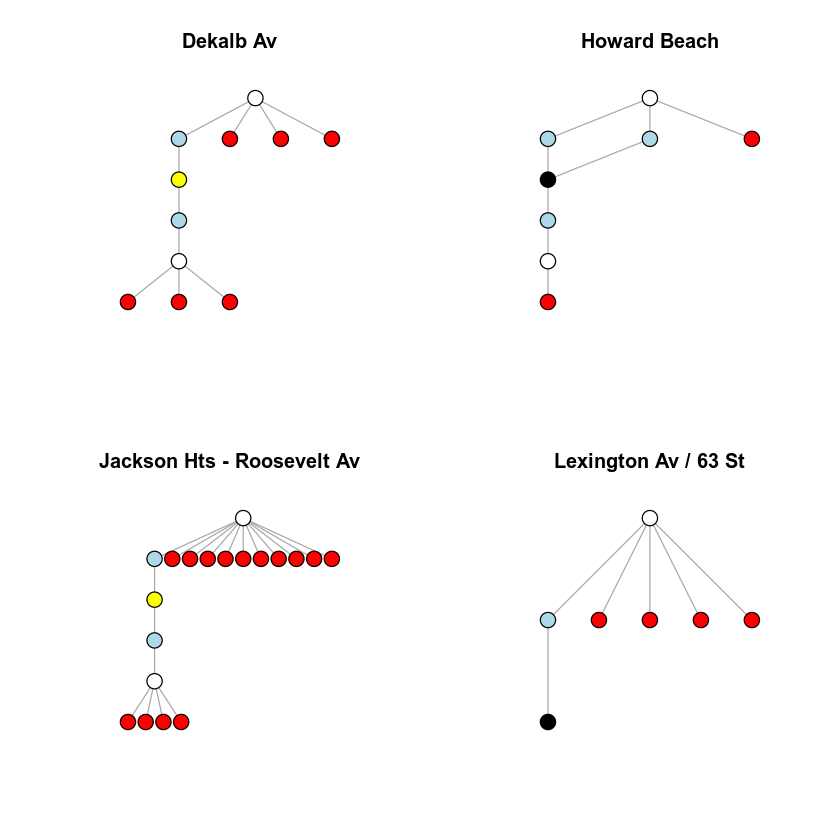

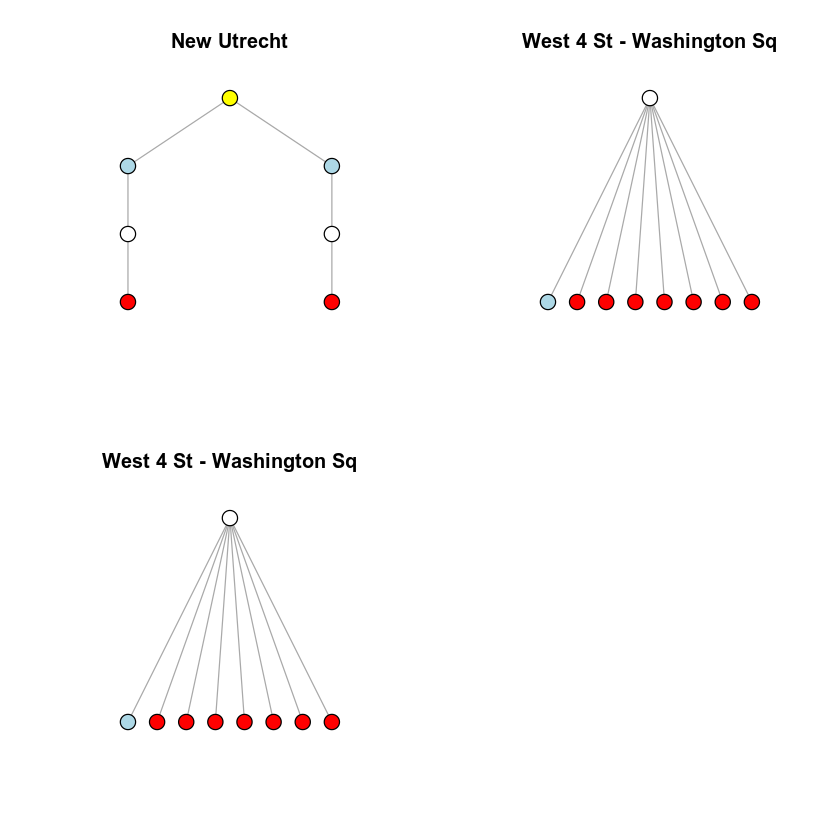

In [441]:
# pdf('../../reports/figures/station_graphs.pdf')
par(mfrow=c(2,2),mar=c(5.1,4.1,4.1,2.1))
unique_comps = unique(V(el)$component)
incomplete_stations = vector()
for (i in unique_comps){
#     if((i-1) %% 9 == 0){
#         par(mfrow=c(3,3),mar=c(5.1,4.1,4.1,2.1))
#     }
    g <- induced_subgraph(el,V(el)[V(el)$component == i])
    if(!("Street" %in% V(g)$node_type)){
        incomplete_stations <- c(incomplete_stations,V(g)$label[V(g)$node_type == "Elevator"])
        plot(g,color=V(g)$color,vertex.size=15,vertex.label.cex=0.01,vertex.label.dist=0,vertex.label.color='black',layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
}
# dev.off()

In [333]:
el_centrality <- data.frame(el_id = V(el)$label[V(el)$node_type == "Elevator"],
                            eig_cent = centr_eigen(el)$vector[V(el)$node_type == "Elevator"],
                            bw_cent = centr_betw(el)$res[V(el)$node_type == "Elevator"],stringsAsFactors = F)

In [335]:
el_centrality %>% arrange(desc(bw_cent)) %>% head(10)

el_id,eig_cent,bw_cent
<chr>,<dbl>,<dbl>
EL723,0.000000e+00,650
EL232,2.455622e-01,380
EL301,0.000000e+00,342
EL720,4.530164e-18,308
EL733X,0.000000e+00,308
EL719,1.041995e-17,230
EL721,0.000000e+00,230
EL732,0.000000e+00,230
EL729X,0.000000e+00,230


In [340]:
el_centrality[el_centrality$el_id %in% c("EL717X","EL718X"),]

,el_id,eig_cent,bw_cent
,<chr>,<dbl>,<dbl>
224,EL718X,1.801917e-17,70.5
225,EL717X,7.081553e-18,70.5


[1] "EL225" "EL215" "EL216" "EL214" "EL34X" "EL227" "EL228" "EL226"

[1]  90 140  62  62   0  90 182  90


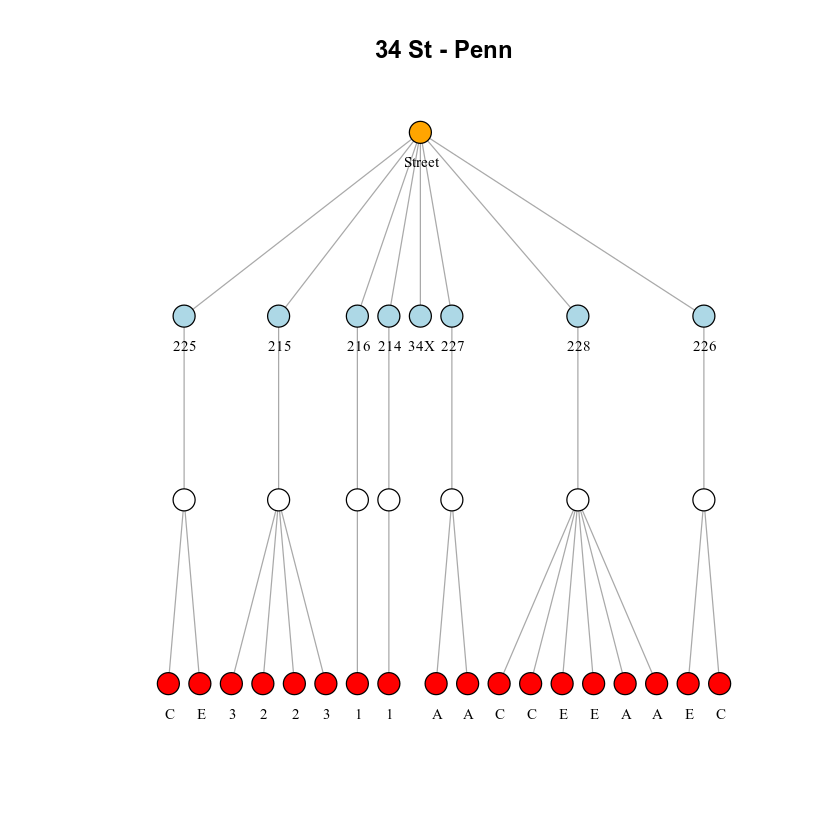

In [439]:
par(mfrow=c(1,1))
h <- induced_subgraph(el,V(el)[V(el)$component == comp$membership[V(el)$label == "EL227"]])
V(h)$label[V(h)$node_type == "Elevator"]
print(centr_betw(h)$res[V(h)$node_type == "Elevator"])
plot(h,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub(pattern="-north|-south|Platform|Upper|Lower|Mezzanine|EL",'',V(h)$label),vertex.label.cex=0.75,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(h,root=V(h)[V(h)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(h)$label]))

[1] "EL277"

[1] 0


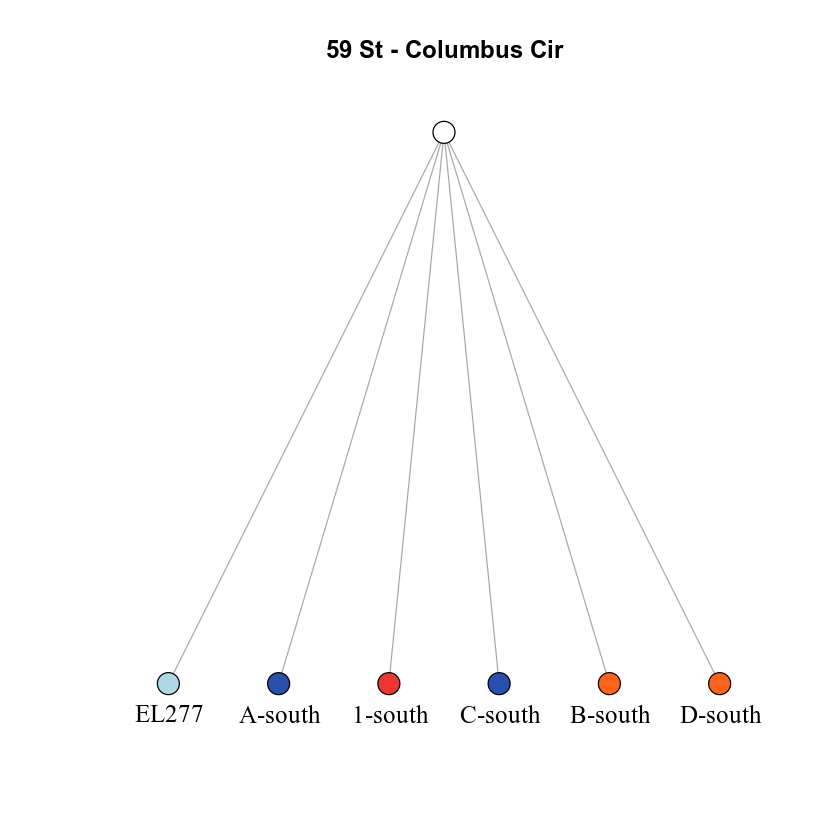

In [462]:
par(mfrow=c(1,1))
h <- induced_subgraph(el,V(el)[V(el)$component == comp$membership[V(el)$label == "EL277"]])
V(h)$label[V(h)$node_type == "Elevator"]
print(centr_betw(h)$res[V(h)$node_type == "Elevator"])
plot(h,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub(pattern="Platform|Upper|Lower|Mezzanine",'',V(h)$label),vertex.label.cex=1.25,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(h,root=V(h)[V(h)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(h)$label]))

drop elevator and check connectedness of the graph

In [362]:
V(h)
V(h)$label

+ 10/10 vertices, from 67c25f2:
 [1]  1  2  3  4  5  6  7  8  9 10

[1] "EL396"                  "Myrtle Av / Wyckoff Av" "Mezzanine"             
 [4] "EL397"                  "Platform"               "EL398"                 
 [7] "L-south"                "M-north"                "L-north"               
[10] "M-south"

In [372]:
all_simple_paths(h,from = V(h)[V(h)$node_type == "Street"],to =  V(h)[V(h)$node_type == "Train"])

[[1]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 4 5 7

[[2]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 4 5 8

[[3]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 4 5 9

[[4]]
+ 6/10 vertices, from 67c25f2:
[1]  2  1  3  4  5 10

[[5]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 6 5 7

[[6]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 6 5 8

[[7]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 6 5 9

[[8]]
+ 6/10 vertices, from 67c25f2:
[1]  2  1  3  6  5 10


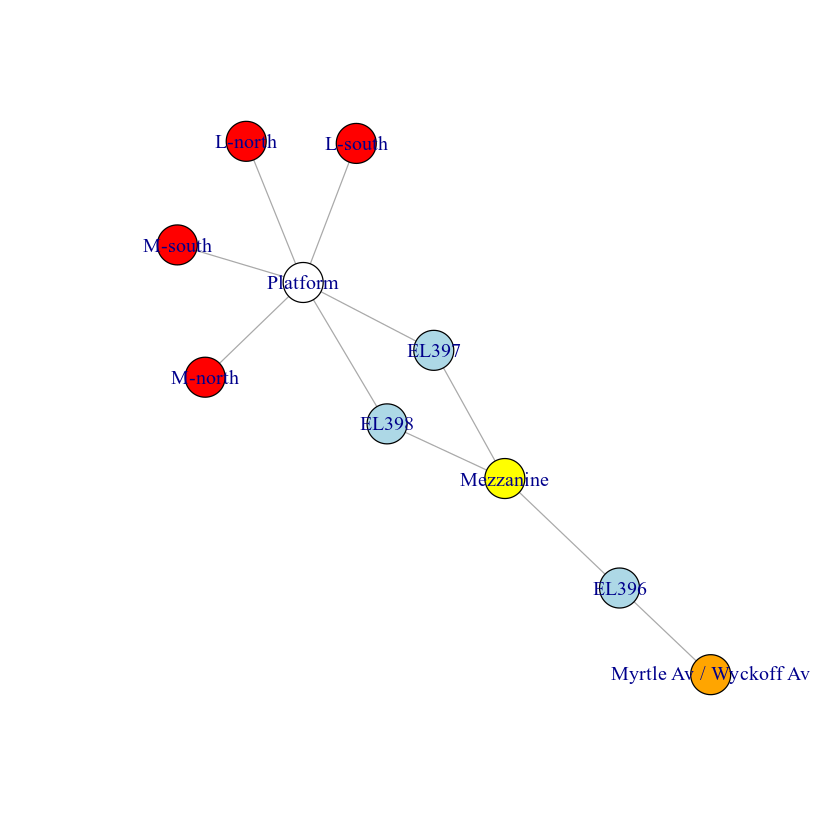

In [421]:
plot(h)

In [424]:
h_tmp <- delete_vertices(h,V(h)[V(h)$label == "EL396"])

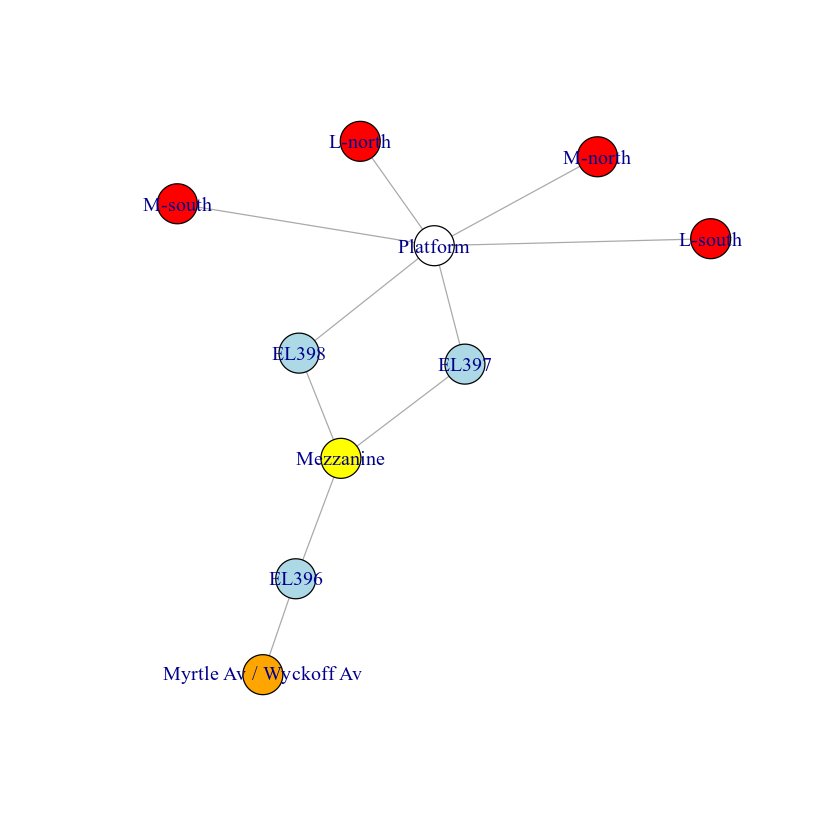

In [432]:
plot(induced_subgraph(el,subcomponent(el,V(el)[V(el)$label == "EL396"])))

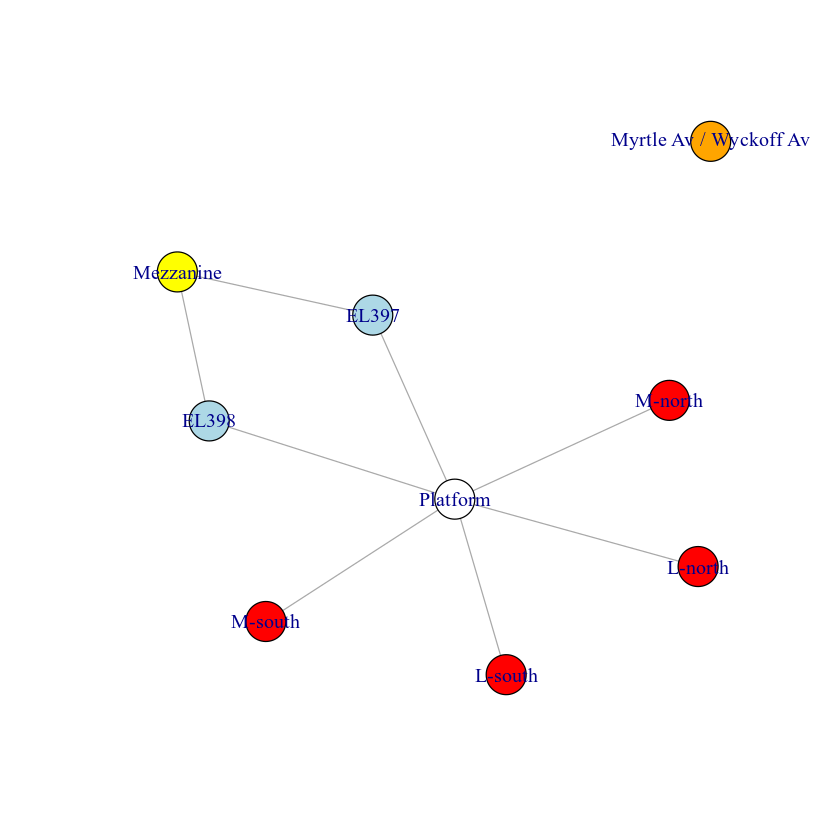

In [433]:
plot(h_tmp)

In [426]:
centr_betw(h)

$res
 [1]  8.0  0.0 14.5  7.5 26.5  7.5  0.0  0.0  0.0  0.0

$centralization
[1] 0.6203704

$theoretical_max
[1] 324

In [448]:
routes <- read.csv('../../data/raw/google_transit/routes.txt',stringsAsFactors = F)

In [456]:
head(routes)

route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,MTA NYCT,1,Broadway - 7 Avenue Local,"Trains operate between 242 St in the Bronx and South Ferry in Manhattan, at all times",1,http://web.mta.info/nyct/service/pdf/t1cur.pdf,EE352E,
2,MTA NYCT,2,7 Avenue Express,"Trains operate between Wakefield-241 St, Bronx, and Flatbush Av-Brooklyn College, Brooklyn, at all times. Trains operate local in Bronx and Brooklyn. Trains operate express in Manhattan except late night when it operates local.",1,http://web.mta.info/nyct/service/pdf/t2cur.pdf,EE352E,
3,MTA NYCT,3,7 Avenue Express,"Trains operate between 148 St, 7 Av, Manhattan, and New Lots Av, Brooklyn, at all times except late nights. During late nights, trains operate only in Manhattan between 148 St, 7 Av and Times Square-42 St.",1,http://web.mta.info/nyct/service/pdf/t3cur.pdf,EE352E,
4,MTA NYCT,4,Lexington Avenue Express,"Trains operate daily between Woodlawn/Jerome Av, Bronx, and Utica Av/Eastern Pkwy, Brooklyn, running express in Manhattan and Brooklyn. During late night and early morning hours, trains run local in Manhattan and Brooklyn, and extend beyond Utica Av to New Lots/Livonia Avs, Brooklyn.",1,http://web.mta.info/nyct/service/pdf/t4cur.pdf,00933C,
5,MTA NYCT,5,Lexington Avenue Express,"Weekdays daytime, most trains operate between either Dyre Av or 238 St-Nereid Av, Bronx, and Flatbush Av-Brooklyn College, Brooklyn. At all other times except during late nights, trains operate between Dyre Av, Bronx, and Bowling Green, Manhattan. During late nights trains operate only in the Bronx between Dyre Av and E 180 St/MorrisPark Av. Customers who ride during late night hours can transfer to 2 service at the E 180 St Station. At all times, trains operate express in Manhattan and Brooklyn. Weekdays, trains in the Bronx operate express from E 180 St to 149 St-3 Av during morning rush hours (from about 6 AM to 9 AM), and from 149 St-3 Av to E 180 St during the evening rush hours (from about 4 PM to 7 PM).",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,
5X,MTA NYCT,5X,Lexington Avenue Express,"Weekdays daytime, most trains operate between either Dyre Av or 238 St-Nereid Av, Bronx, and Flatbush Av-Brooklyn College, Brooklyn. At all other times except during late nights, trains operate between Dyre Av, Bronx, and Bowling Green, Manhattan. During late nights trains operate only in the Bronx between Dyre Av and E 180 St/MorrisPark Av. Customers who ride during late night hours can transfer to 2 service at the E 180 St Station. At all times, trains operate express in Manhattan and Brooklyn. Weekdays, trains in the Bronx operate express from E 180 St to 149 St-3 Av during morning rush hours (from about 6 AM to 9 AM), and from 149 St-3 Av to E 180 St during the evening rush hours (from about 4 PM to 7 PM).",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,


In [463]:
V(el)$color[V(el)$node_type=="Train"] <- paste0("#",routes$route_color[match(gsub("-.*","",V(el)$label[V(el)$node_type=="Train"]),routes$route_id)])

In [464]:
V(el)$color[V(el)$color == "#NA" | V(el)$color == "#"] <- 'grey'

In [465]:
V(el)$component,V(el)$label

[1]   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   3   3   3
  [19]   3   3   3   3   4   4   4   4   4   4   4   4   4   5   5   5   5   5
  [37]   6   6   6   6   6   6   6   6   6   6   6   7   7   7   8   8   8   8
  [55]   8   8   7   7   7   7   9   9   9   9   9  10  10  10  10  10  10  11
  [73]  11  11  11  11  11  11  11  11  11  12  12  12  12  12  12  13  13  13
  [91]  13  13  13  13  14  14  14  14  14  15  15  15  15  15  15  15  16  16
 [109]  16  16  16  17  17  17  17  17  18  18  18  18  18  18  18  19  19  19
 [127]  20  20  20  20  20  20  20  20  20  20  20  20  21  21  21  21  21  22
 [145]  22  22  22  23  23  23  23  23  23  23  23  23  23  23  23  23  23  23
 [163]  23  24  24  24  24  24  25  25  25  25  25  25  25  25  25  25  26  26
 [181]  26  27  27  27  26  26  26  28  28  28  28  28  28  28  29  29  29  30
 [199]  30  30  30  30  31  31  31  31  31  32  32  32  32  32  32  32  32  33
 [217]  33  33  33  33  34  34  33  33  35  35  36  36  36  36  36  36  36  36
 [235]  36  36  37  37  37  37  37  38  38  38  38  38  38  38  39  39  39  39
 [253]  39  40  40  40  40  40  40  40  40  40  41  41  41  42  42  42  43  43
 [271]  43  44  44  44  45  45  45  46  46  46  46  46  47  47  47  47  47  48
 [289]  48  48  48  48  49  49  49  50  50  50  50  50  50  50  50  50  50  50
 [307]  50  50  50  50  50  50  50  50  50  51  51  51  51  51  51  51  52  52
 [325]  52  52  52  52  52  53  53  53  53  53  54  54  54  55  55  55  56  56
 [343]  56  57  57  58  58  59  59  59  60  60  61  61  62  62  62  62  62  62
 [361]  62  63  63  63  63  63  64  64  64  64  64  64  64  64  64  64  64  65
 [379]  65  65  65  65  65  65  65  65  65  65  66  66  66  66  66  67  67  67
 [397]  67  67  68  68  68  68  68  68  68  68  68  68  68  69  69  69  69  69
 [415]  69  69  70  70  70  70  71  71  71  71  71  72  72  72  73  73  73  73
 [433]  73  74  74  74  75  75  75  75  75  76  76  76  76  76  76  76  77  77
 [451]  77  77  77  78  78  78  79  79  79  79  79  79  79  80  80  80  81  81
 [469]  81  81  81  81  81  82  82  82  82  82  82  82  83  83  83  83  83  84
 [487]  84  84  84  84  84  84  84  84  84  84  84  84  84  84  84  84  84  84
 [505]  84  84  84  84  84  85  85  85  85  85  86  86  86  86  87  87  87  87
 [523]  87  87  86  86  88  88  88  89  89  89  89  89  89  89  90  90  90  90
 [541]  90  91  91  91  92  92  92  92  92  93  93  93  93  93  94  94  94  94
 [559]  94  94  94  94  94  94  95  95  95  95  95  95  95  96  96  96  96  96
 [577]  96  96  97  97  97  97  97  98  98  98  98  98  98  98  99  99  99  99
 [595]  99 100 100 100 100 101 101 101 100 100 100 100 100 100 100 102 102 102
 [613] 102 102 103 103 103 103 103 103 104 104 104 104 104 105 105 105 105 105
 [631] 106 106 106 106 106 107 107 107 107 107 108 108 108 108 108 108 108 109
 [649] 109 109 109 109 110 110 110 110 110 110 110 111 111 111 111 111 112 112
 [667] 112 112 112 113 113 113 113 113 114 114 114 114 114 114 114 115 115 115
 [685] 115 115 115 115 115 115 115 115 116 116 116 116 116 116 116 117 117 118
 [703] 118 119 119 119 120 120 120 120 121 121 121 121 121 121 121 121 121 121
 [721] 121  13  13 107   9   1   1   1   1   1   1   1   1 112 112 112 112   5
 [739]   5   5   5   6   6   6   6   6   6 108 108 108 108   7   7   7   7   1
 [757]   1   1   1   1   1   1   1  47  47  47  47  47  47  14  14  75  75  75
 [775]  75  68  68  74   2   2   2   2  85  85  85  85  17  17  81  81  98  98
 [793]  98  98  18  18  18  18  89  89  31  31  25  25  25  25  25  25  30  30
 [811]  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  23  23
 [829]  23  23  23  23   4   4   4   4   4   4   4   4   4   4   3   3   3   3
 [847]   3   3  43  43  23  23  23  23  23  23  23  23  23  23  23  23 115 115
 [865] 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115
 [883] 115 115 115 115 115 115 115 115 115  28  28  28  28  28  28  28  28  37
 [901]  37  39  39  39  39  39  39  25  25  99  99  9

In [ ]:
ee$station_name[ee$equipment_id %in% V(h)$label]

In [503]:
directions <- c('south', 'north', 'manhattan', 'wakefield 241 st', 'woodlawn','norwood 205 st', 'jamaica', 'bay ridge','flatbush av brooklyn college', '637N, 637S',
                'brighton beach, coney island, bay ridge', 'coney island','coney island, brighton beach', 'jamaica center','flushing main st', 'flushing', 'jamaica, forest hills',
                'manhattan-bound', 'far rockaway', 'brighton beach/coney island')
dir_filter <- paste(paste0("-",directions,"|"),collapse="")

In [505]:
dir_filter

[1] "-south|-north|-manhattan|-wakefield 241 st|-woodlawn|-norwood 205 st|-jamaica|-bay ridge|-flatbush av brooklyn college|-637N, 637S|-brighton beach, coney island, bay ridge|-coney island|-coney island, brighton beach|-jamaica center|-flushing main st|-flushing|-jamaica, forest hills|-manhattan-bound|-far rockaway|-brighton beach/coney island|"

In [507]:
V(el)$clean_label <- gsub("METRO-NORTH","MNR",gsub(pattern=paste0(dir_filter,"Platform|Upper|Lower|Mezzanine"),'',V(el)$label))

In [476]:
station_components <- data.frame(component=V(el)$component,station=ee$station_name[match(V(el)$label,ee$equipment_id)],stringsAsFactors = F)

In [477]:
unique_stations <- unique(station_components$station)

In [483]:
unique_stations <- unique_stations[!is.na(unique_stations)]

In [526]:
for(x in unique_stations){
    comps <- unique(station_components$component[station_components$station == x])
    comps <- comps[!is.na(comps)]
    file_name <- gsub("_","_",gsub("[-/&_() ]+","_",x))
    png(paste0('../../reports/figures/elevator_maps/',file_name,'.png'),width = 1000,height = 1000)
    par(mfrow=c(length(comps),1))
    for(i in comps){
        g <- induced_subgraph(el,V(el)[V(el)$component == i])
        plot(g,vertex.size=8,vertex.label.degree=67.5,vertex.label=V(g)$clean_label,vertex.label.cex=1.25,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
    dev.off()
}

In [517]:
?png

png {grDevices},R Documentation
filename,"the name of the output file. The page number is substituted if a C integer format is included in the character string, as in the default. (The result must be less than PATH_MAX characters long, and may be truncated if not. See postscript for further details.) Tilde expansion is performed where supported by the platform."
width,the width of the device.
height,the height of the device.
units,"The units in which height and width are given. Can be px (pixels, the default), in (inches), cm or mm."
pointsize,"the default pointsize of plotted text, interpreted as big points (1/72 inch) at res ppi."
bg,"the initial background colour: can be overridden by setting par(""bg"")."
quality,"the ‘quality’ of the JPEG image, as a percentage. Smaller values will give more compression but also more degradation of the image."
compression,"the type of compression to be used. Ignored for type = ""quartz""."
res,"The nominal resolution in ppi which will be recorded in the bitmap file, if a positive integer. Also used for units other than the default, and to convert points to pixels."
...,"for type = ""Xlib"" only, additional arguments to the underlying X11 device such as fonts or family. For types ""cairo"" and ""quartz"", the family argument can be supplied. See the ‘Cairo fonts’ section in the help for X11."
